In [1]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from glob import glob
sys.path.append('..')
from common import common

In [2]:
quantity = 'pT_yy'

In [3]:
def create_dir_if_not_exits(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        
input_basefolder = '../output/folding_matrices/{quantity}/np_array'.format(quantity=quantity)

output_dir = "../output/folding_matrices_sysvar/{quantity}/np_arrays/".format(quantity=quantity)
output_dir_plots = "../output/folding_matrices_sysvar/{quantity}/plots/".format(quantity=quantity)
create_dir_if_not_exits(output_dir)
create_dir_if_not_exits(output_dir_plots)

In [4]:
fname_nominal = '{input_folder}/folding_matrix_isPassed_for_workspace_{quantity}_mcAll_prodAll_Nominal.npy'.format(
                 input_folder=input_basefolder, quantity=quantity)
matrix_nominal = np.load(fname_nominal)
matrix_nominal = np.nan_to_num(matrix_nominal)   # there could be nan where xsection=0, e.g. underflow for pTyy

In [5]:
all_fn = glob('{basedir}/folding_matrix_isPassed_for_workspace_{quantity}_mcAll_prodAll_*.npy'.format(basedir=input_basefolder, quantity=quantity))
dict_fn = {}
for fn in all_fn:
    basename = os.path.basename(fn)
    sys = basename.split('prodAll_')[1].replace('.npy', '')
    if sys == 'Nominal':
        continue
    dict_fn[sys] = fn

if not dict_fn:
    raise ValueError('no systematic found')

print("found %d systematics" % len(dict_fn))

found 39 systematics


/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


not plotting sys JET_EffectiveNP_1__1up: too small


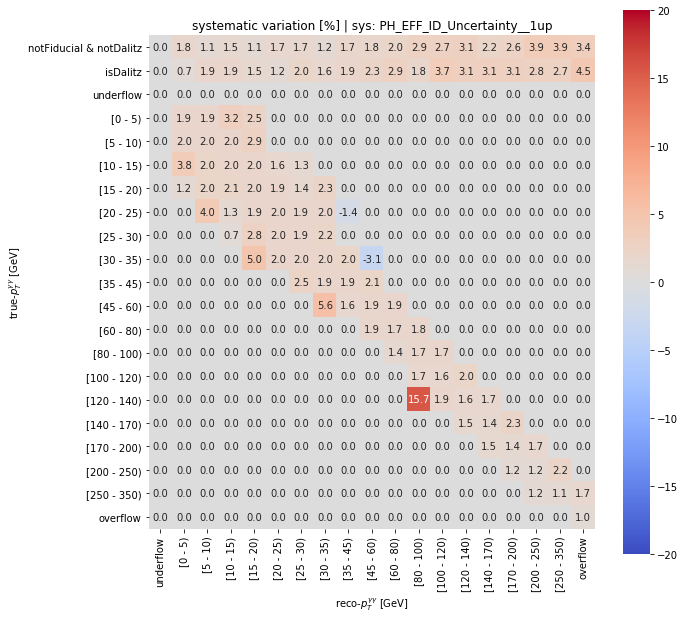

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


not plotting sys JET_EffectiveNP_6__1up: too small
not plotting sys JET_Pileup_OffsetMu__1up: too small


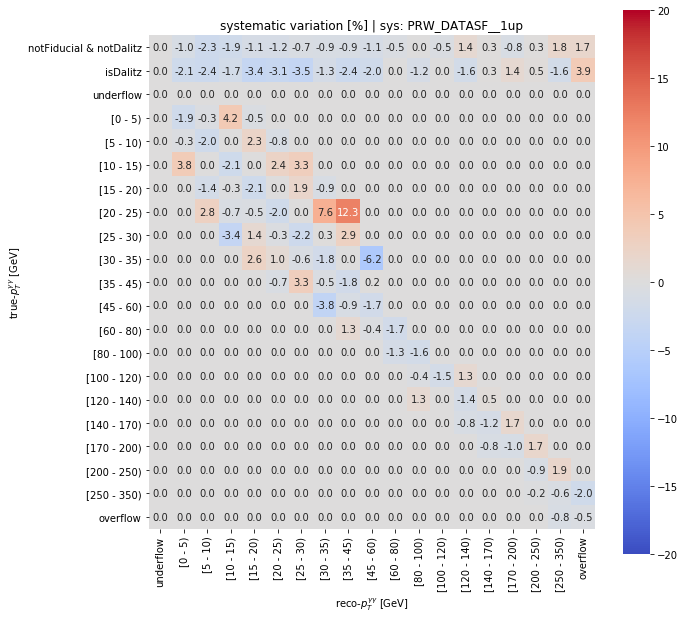

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


not plotting sys JET_EffectiveNP_5__1up: too small
not plotting sys JET_EtaIntercalibration_NonClosure_posEta__1up: too small


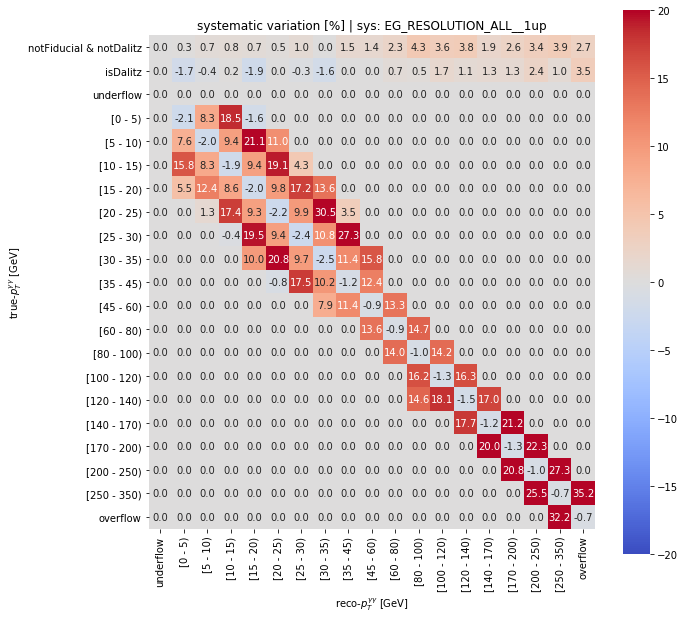

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


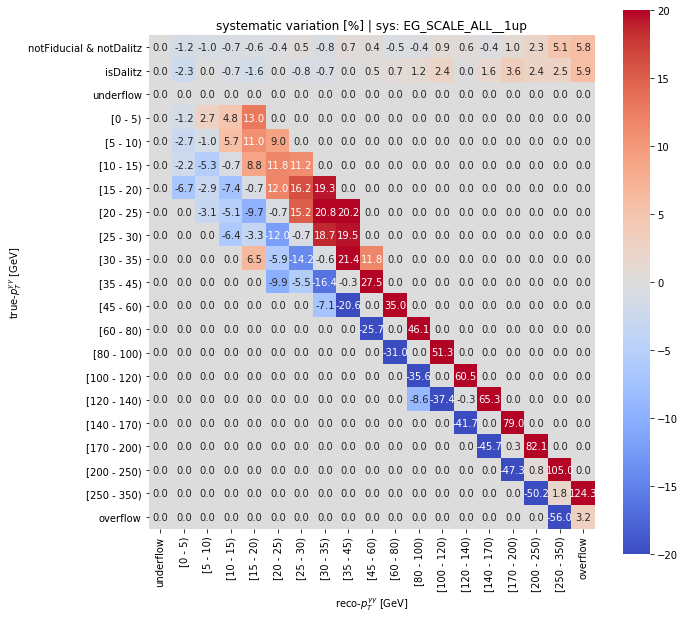

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


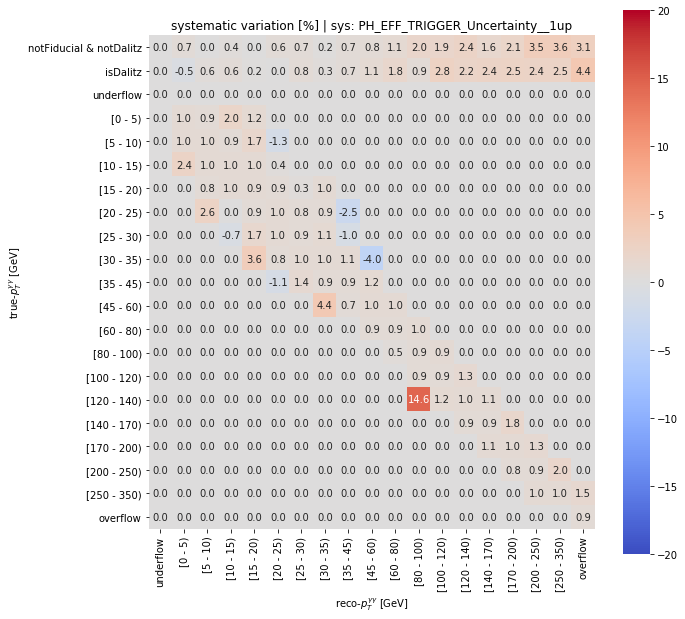

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


not plotting sys JET_JER_EffectiveNP_6__1up: too small
not plotting sys JET_EffectiveNP_4__1up: too small
not plotting sys JET_JER_EffectiveNP_3__1up: too small
not plotting sys JET_Pileup_RhoTopology__1up: too small


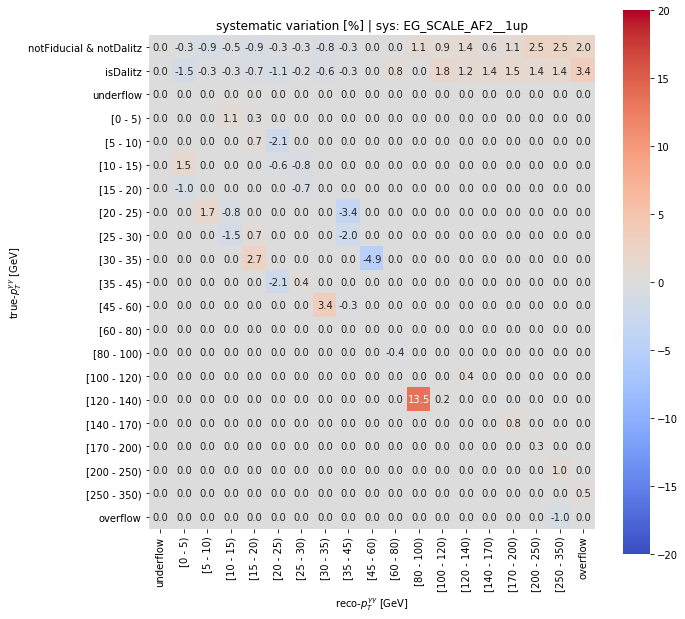

/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


not plotting sys JET_EtaIntercalibration_NonClosure_highE__1up: too small
not plotting sys JET_JvtEfficiency__1up: too small
not plotting sys JET_EffectiveNP_8restTerm__1up: too small
not plotting sys JET_EffectiveNP_2__1up: too small
not plotting sys JET_Flavor_Composition__1up: too small
not plotting sys JET_SingleParticle_HighPt__1up: too small
not plotting sys JET_EffectiveNP_7__1up: too small
not plotting sys JET_JER_EffectiveNP_5__1up: too small
not plotting sys JET_JER_EffectiveNP_2__1up: too small
not plotting sys JET_Pileup_PtTerm__1up: too small
not plotting sys JET_JER_EffectiveNP_1__1up: too small
not plotting sys JET_JER_DataVsMC__1up: too small
not plotting sys JET_fJvtEfficiency__1up: too small


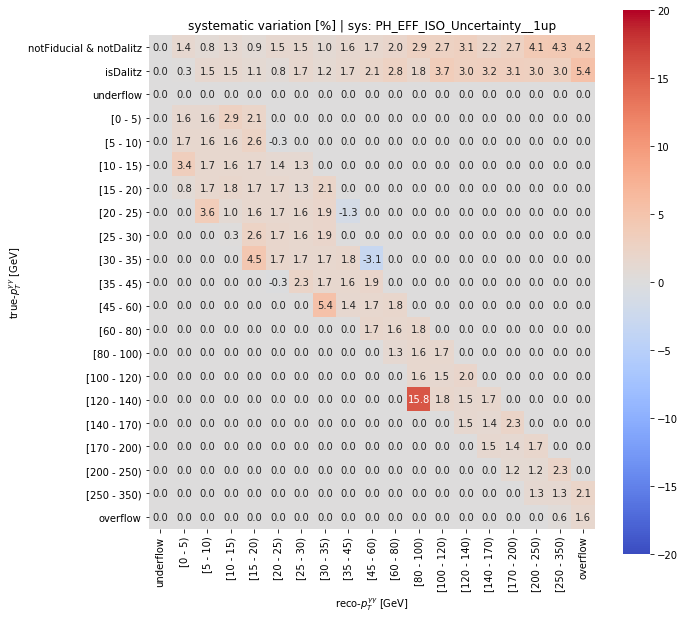

not plotting sys JET_BJES_Response__1up: too small
not plotting sys JET_EffectiveNP_3__1up: too small
not plotting sys JET_JER_EffectiveNP_7restTerm__1up: too small
not plotting sys JET_PunchThrough_MC16__1up: too small
not plotting sys JET_EtaIntercalibration_TotalStat__1up: too small
not plotting sys JET_EtaIntercalibration_NonClosure_negEta__1up: too small
not plotting sys JET_Pileup_OffsetNPV__1up: too small
not plotting sys JET_Flavor_Response__1up: too small
not plotting sys JET_JER_EffectiveNP_4__1up: too small
not plotting sys JET_EtaIntercalibration_Modelling__1up: too small


/home/turra/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [7]:
for sys_name in dict_fn:
    fname_systematic = dict_fn[sys_name]  # python 2/3 compatibility

    matrix_syst = np.load(fname_systematic)
    matrix_syst = np.nan_to_num(matrix_syst)
    
    matrix_ratio = matrix_syst / matrix_nominal - 1
    matrix_ratio[matrix_nominal == 0] = 0
    matrix_ratio[matrix_syst == 0] = 0
    
    matrix_ratio = np.nan_to_num(matrix_ratio)
    

    matrix_ratio[abs(matrix_ratio) < 0.002] = 0
    matrix_ratio[matrix_syst < 2E-5] = 0
    matrix_ratio[matrix_nominal < 2E-5] = 0

    np.save(os.path.join(output_dir, 'variation_sys_%s.npy' % sys_name), matrix_ratio)
    
    matrix_mean = np.mean(np.abs(matrix_ratio))
    do_plot = matrix_mean > 0.001

    if not do_plot:
        print("not plotting sys %s: too small" % sys_name)
        continue

    bin_labels = common.bin_labels[quantity]
    bin_labels_x = ['underflow'] + list(bin_labels) + ['overflow']
    bin_labels_y = ['notFiducial & notDalitz', 'isDalitz', 'underflow'] + list(bin_labels) + ['overflow']

    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(matrix_ratio * 100,
                     xticklabels=bin_labels_x,
                     yticklabels=bin_labels_y,
                     vmin=-20, vmax=20,
                     center=0,
                     annot=True, fmt='.1f',
                     cmap='coolwarm',
                     ax=ax,
                     square=True)

    ax.set_xlabel('reco-%s' % common.latex_labels[quantity])
    ax.set_ylabel('true-%s' % common.latex_labels[quantity])
    ax.set_title('systematic variation [%%] | sys: %s' % sys_name)
    plt.show()

    fig.savefig(os.path.join(output_dir_plots, 'variation_%s.png' % sys_name), bbox_inches='tight')
    fig.savefig(os.path.join(output_dir_plots, 'variation_%s.pdf' % sys_name), bbox_inches='tight')